# 计算机视觉实验四——特征提取与选择

## @Author:Chen Zhang

## 1．水果图像的分割
- 设计合理的分割算法，实现对单个水果的分割；
- 分割之前是否需要进行图像增强，可根据实际情况决定。
- 注：水果类型可选择苹果、桔子、香蕉中的任一种，图片在网上搜集。

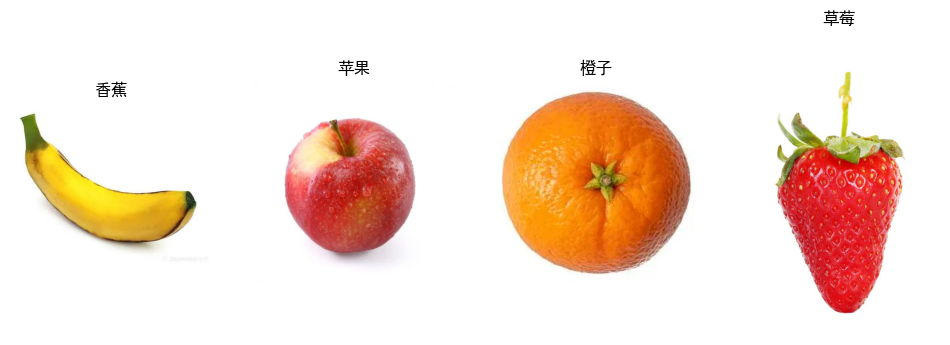

In [1]:
import cv2  
import numpy as np  
import matplotlib.pyplot as plt  
plt.rcParams['font.sans-serif']=['SimHei'] # 处理中文乱码  
    
# 读取图像  
banana = cv2.imread('banana.jpg')  
apple = cv2.imread('apple.jpg')
orange = cv2.imread('orange.jpg')
strawberry = cv2.imread('strawberry.jpg')

plt.figure(figsize=(12,4))

plt.subplot(1,4,1)
plt.imshow(cv2.cvtColor(banana, cv2.COLOR_BGR2RGB))
plt.title('香蕉')
plt.axis('off')

plt.subplot(1,4,2)
plt.imshow(cv2.cvtColor(apple, cv2.COLOR_BGR2RGB))
plt.title('苹果')
plt.axis('off')

plt.subplot(1,4,3)
plt.imshow(cv2.cvtColor(orange, cv2.COLOR_BGR2RGB))
plt.title('橙子')
plt.axis('off')

plt.subplot(1,4,4)
plt.imshow(cv2.cvtColor(strawberry, cv2.COLOR_BGR2RGB))
plt.title('草莓')
plt.axis('off')

plt.show()

### 直方图展示

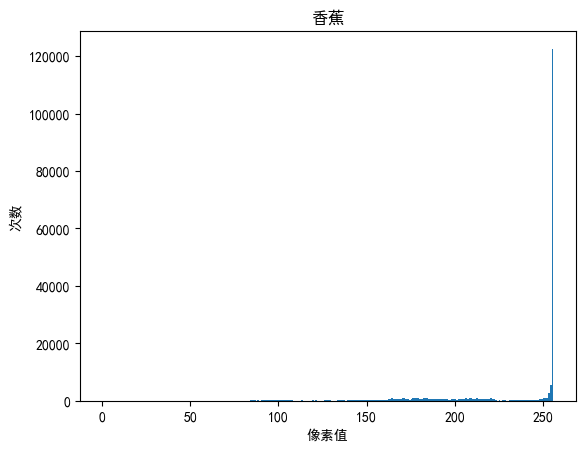

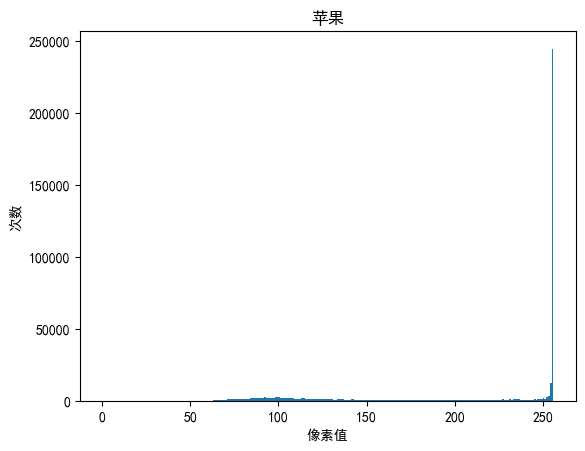

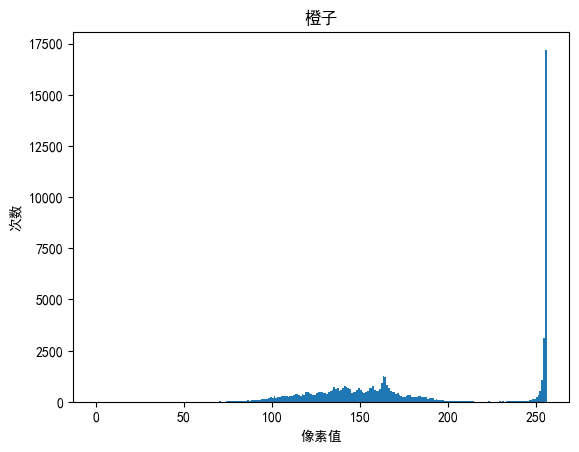

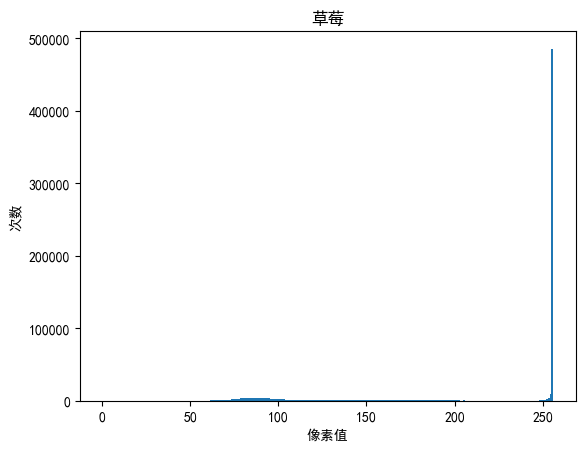

In [2]:
def plot_histogram(img, title): 
    plt.hist(img.ravel(), 256, [0, 256])  
    plt.title(title)  
    plt.xlabel('像素值')  
    plt.ylabel('次数')  
    plt.show() 

# 转化为灰度图
banana_gray = cv2.cvtColor(banana, cv2.COLOR_BGR2GRAY) 
apple_gray = cv2.cvtColor(apple, cv2.COLOR_BGR2GRAY)
orange_gray = cv2.cvtColor(orange, cv2.COLOR_BGR2GRAY)
strawberry_gray = cv2.cvtColor(strawberry, cv2.COLOR_BGR2GRAY)

plot_histogram(banana_gray,'香蕉')
plot_histogram(apple_gray,'苹果')
plot_histogram(orange_gray,'橙子')
plot_histogram(strawberry_gray,'草莓')

## 分析
- 由于背景色为白色,对比度已经很强
- 因此不需要做数据增强的处理

### 使用二值化对图像进行分割
- 由于背景色趋于255,所以阈值可以尽可能调高一点,经过多次调参,发现240的阈值较为合适

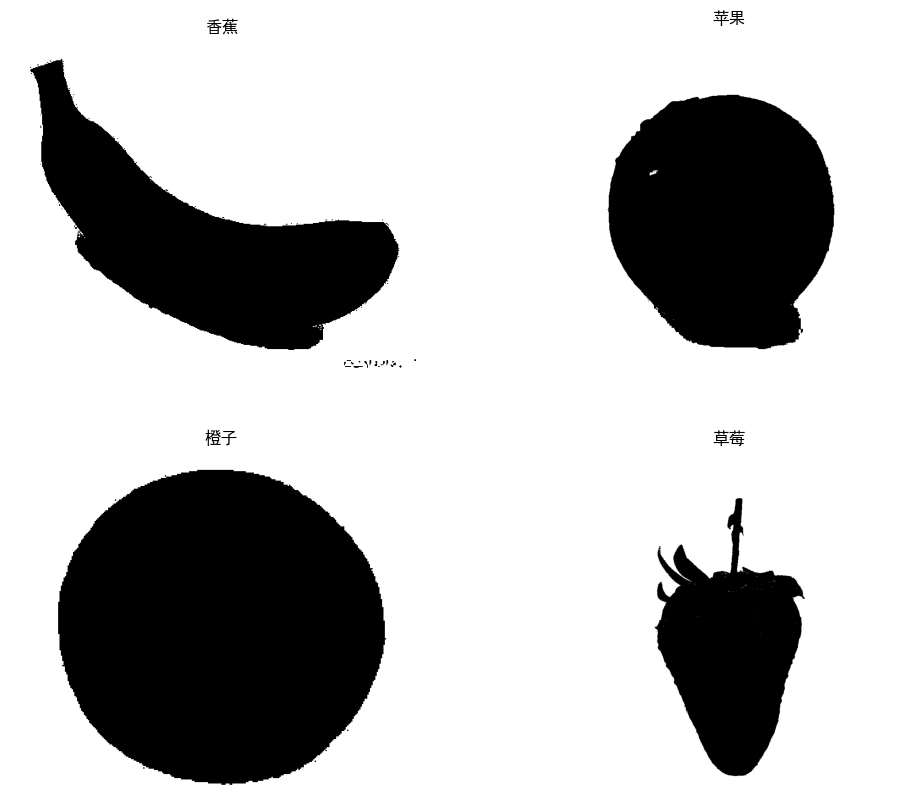

In [3]:
max_value = 255  # 二值化后的最大值  

ret, binary_image_banana = cv2.threshold(banana_gray, 240, max_value, cv2.THRESH_BINARY)
ret, binary_image_apple = cv2.threshold(apple_gray, 240, max_value, cv2.THRESH_BINARY)
ret, binary_image_orange = cv2.threshold(orange_gray, 240, max_value, cv2.THRESH_BINARY)
ret, binary_image_strawberry = cv2.threshold(strawberry_gray, 240, max_value, cv2.THRESH_BINARY)

# 可视化结果
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.imshow(binary_image_banana,cmap='gray')
plt.title('香蕉')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(binary_image_apple,cmap='gray')
plt.title('苹果')
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(binary_image_orange,cmap='gray')
plt.title('橙子')
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(binary_image_strawberry,cmap='gray')
plt.title('草莓')
plt.axis('off')

plt.show()

## 2．目标的特征提取
- 设计合理的特征提取方法，实现对水果目标的特征提取（如：颜色特征、形状特征、纹理特征等），产生特征向量；

### 颜色特征提取
- 颜色特征通常可以通过将图像转换到不同的颜色空间（如HSV、RGB等）并计算颜色直方图来提取。

In [4]:
import cv2  
import numpy as np  
  
# 读取图像  
image = cv2.imread('apple.jpg')  
  
# 转换到HSV颜色空间  
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)  
  
# 计算颜色直方图  
hist_hsv = cv2.calcHist([hsv_image], [0, 1], None, [180, 256], [0, 180, 0, 256])  
hist_hsv_normalized = cv2.normalize(hist_hsv, hist_hsv, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)  
  
# 将颜色直方图展平为一维特征向量  
color_features = hist_hsv_normalized.flatten()

print('颜色特征:',color_features)

颜色特征: [1.0000000e+00 1.5960928e-05 2.8729672e-04 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00]


### 形状特征提取
- 形状特征通常可以通过计算图像的边界、区域、矩等属性来提取。

In [5]:
import cv2  
import numpy as np  
  
# 读取图像  
image = cv2.imread('apple.jpg')  
  
# 转换图像为灰度图  
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  
  
# 二值化图像  
_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)  
  
# 查找轮廓  
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)  
  
# 初始化轮廓特征列表  
shape_features_all = []  
  
# 遍历所有轮廓  
for contour in contours:  
    # 计算轮廓的面积和周长  
    area = cv2.contourArea(contour)  
    perimeter = cv2.arcLength(contour, True)  
    shape_features = [area, perimeter]  
      
    # 计算矩特征  
    moments = cv2.moments(contour)  
    if moments['m00'] != 0.0:  # 确保轮廓有效  
        hu_moments = cv2.HuMoments(moments)  
        shape_features.extend(hu_moments.flatten())  
      
    # 将当前轮廓的特征添加到总列表中  
    shape_features_all.append(shape_features)  
  
# 打印所有轮廓的特征  
for i, features in enumerate(shape_features_all):  
    print(f"轮廓特征{i+1}: {features}")

轮廓特征1: [431649.0, 2628.0, 0.16666666666666669, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


### 纹理特征提取
- 纹理特征可以通过灰度共生矩阵（GLCM）、局部二值模式（LBP）等算法提取。
- 这里我们使用灰度共生矩阵（GLCM）的一个简化版本，即计算图像的局部对比度。

In [6]:
import cv2  
import numpy as np  
from skimage.feature import graycomatrix, graycoprops  
  
# 读取图像  
image = cv2.imread('apple.jpg')  
  
# 转换图像为灰度图  
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  
  
# 计算灰度共生矩阵  
glcm = graycomatrix(gray_image, distances=[1], angles=[0, np.pi/4, np.pi/2, 3*np.pi/4], levels=256, symmetric=True, normed=True)  
  
# 计算对比度  
contrast = graycoprops(glcm, 'contrast')
  
# 计算对比度的均值  
contrast_mean = np.mean(contrast)  
  
# 将对比度均值作为纹理特征  
texture_features = [contrast_mean]  
  
# 打印纹理特征  
print("纹理特征:", texture_features)

纹理特征: [30.73928109303717]


### 特征向量合并

In [7]:
# 合并所有特征  
feature_vector = np.concatenate((color_features, shape_features, texture_features))
print(feature_vector)

print("特征形状:",feature_vector.shape)

[1.00000000e+00 1.59609281e-05 2.87296716e-04 ... 0.00000000e+00
 0.00000000e+00 3.07392811e+01]
特征形状: (46090,)


## 3．基于遗传算法的特征选择
- 利用得到的特征向量，设计遗传算法实现特征选择。
- 注：是否需要进行特征选择，需根据实际情况做出选择，不做硬性规定。
- 根据当前水果目标的实际情况，给特征向量添加类别标签，以便产生训练样本集，为后续的分类任务做准备。

### 概括：
基于遗传算法的特征选择是一种有效的优化方法，用于从原始特征集中选择出最具代表性的特征子集，以改善模型性能、减少计算复杂度或提高解释性。遗传算法模拟了自然选择和遗传学中的进化过程，通过选择、交叉和变异等操作来逐步优化特征子集。

### 原理分析：
遗传算法通过模拟生物进化过程，在特征选择问题中搜索最优的特征子集。算法从随机生成的特征子集（种群）开始，每个子集被视为一个个体，并通过适应度函数评估其性能。在迭代过程中，算法通过选择适应度高的个体进行交叉和变异操作，生成新的个体，并逐渐进化出适应度更高的特征子集。

### 注意事项：
- 遗传算法需要大量数据作为支撑
- 如果样本只有一个,从原则上不适合用遗传算法处理
- 但本次实验仅做初步的学习,真正应用在实验五,分级系统构建中
- <b>因此本次实验采用随机生成的样本和标签进行遗传算法的学习</b>
- 具体应用请见实验五:分级系统

In [8]:
import numpy as np  
import pandas as pd  
from sklearn.datasets import make_classification  
from sklearn.model_selection import cross_val_score  
from sklearn.tree import DecisionTreeClassifier  
from sklearn.metrics import accuracy_score  
from deap import base, creator, tools, algorithms  
import random  

# 创建一个示例数据集  
X, y = make_classification(  
    n_samples=1000,  
    n_features=20,  
    n_informative=5,  
    n_redundant=10,  
    n_classes=2,  
    n_clusters_per_class=1,  
    random_state=42  
)  

# 将特征转换为DataFrame，便于操作  
df_X = pd.DataFrame(X, columns=[f'特征{i}' for i in range(X.shape[1])])  
  
# 初始化遗传算法参数  
creator.create("FitnessMax", base.Fitness, weights=(1.0,))  
creator.create("Individual", list, fitness=creator.FitnessMax)  
  
toolbox = base.Toolbox()  

# 定义一个函数，用于创建随机的特征子集（个体）  
def create_individual(length):  
    return [random.randint(0, 1) for _ in range(length)]  
  
# 注册个体和种群创建函数  
toolbox.register("attr_bool", random.randint, 0, 1)  
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=df_X.shape[1])  
toolbox.register("population", tools.initRepeat, list, toolbox.individual)  

# 定义适应度函数，使用交叉验证评估特征子集的性能  
def eval_individual(individual):  
    selected_features = np.array(individual)  
    X_selected = df_X.iloc[:, selected_features.nonzero()[0]]  
    clf = DecisionTreeClassifier()  
    scores = cross_val_score(clf, X_selected, y, cv=5, scoring='accuracy')  
    return np.mean(scores),  
  
# 注册适应度函数  
toolbox.register("evaluate", eval_individual)  
  
# 定义遗传算法的遗传操作  
toolbox.register("mate", tools.cxTwoPoint)  
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)  
toolbox.register("select", tools.selTournament, tournsize=3)  

# 设置遗传算法参数  
pop_size = 50  
cxpb = 0.5  
mutpb = 0.2  
ngen = 40  
  
# 创建初始种群  
pop = toolbox.population(n=pop_size)  

# 执行遗传算法  
hof = tools.HallOfFame(1)  
stats = tools.Statistics(lambda ind: ind.fitness.values)  
stats.register("avg", np.mean, axis=0)  
stats.register("std", np.std, axis=0)  
stats.register("min", np.min, axis=0)  
stats.register("max", np.max, axis=0)  
  
pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=cxpb, mutpb=mutpb, ngen=ngen, stats=stats, halloffame=hof, verbose=True)  
  
# 输出最佳特征子集  
best_individual = hof[0]  
selected_features = np.array(best_individual)  
selected_feature_indices = np.where(selected_features)[0]  
selected_feature_names = df_X.columns[selected_feature_indices]  
print("选用的特征:", selected_feature_names)  

# 分割数据集为训练集和测试集  
from sklearn.model_selection import train_test_split  
  
X_train, X_test, y_train, y_test = train_test_split(df_X, y, test_size=0.2, random_state=42)  
  
# 使用最佳特征子集创建训练集和测试集  
X_train_best = X_train[selected_feature_names]  
X_test_best = X_test[selected_feature_names]  
  
# 使用最佳特征子集训练模型  
clf_best = DecisionTreeClassifier()  
clf_best.fit(X_train_best, y_train)  
  
# 使用测试集评估模型性能  
y_pred = clf_best.predict(X_test_best)  
accuracy = accuracy_score(y_test, y_pred)  
print(f"使用最佳特征子集时的准确性: {accuracy}")

gen	nevals	avg      	std         	min    	max    
0  	50    	[0.93026]	[0.03485158]	[0.796]	[0.967]
1  	26    	[0.95266]	[0.01331857]	[0.917]	[0.97] 
2  	36    	[0.95792]	[0.0150756] 	[0.881]	[0.97] 
3  	25    	[0.9629] 	[0.00471275]	[0.942]	[0.97] 
4  	27    	[0.96182]	[0.0105635] 	[0.918]	[0.971]
5  	29    	[0.96562]	[0.00338757]	[0.958]	[0.973]
6  	35    	[0.965]  	[0.00408901]	[0.956]	[0.977]
7  	31    	[0.96712]	[0.00376106]	[0.956]	[0.977]
8  	31    	[0.9669] 	[0.00795801]	[0.919]	[0.976]
9  	29    	[0.96944]	[0.00755291]	[0.92] 	[0.974]
10 	26    	[0.9663] 	[0.01826828]	[0.882]	[0.975]
11 	24    	[0.9711] 	[0.00318277]	[0.962]	[0.975]
12 	33    	[0.9713] 	[0.00313209]	[0.962]	[0.975]
13 	27    	[0.97238]	[0.00211556]	[0.964]	[0.977]
14 	25    	[0.97282]	[0.00192551]	[0.968]	[0.977]
15 	26    	[0.97162]	[0.00758918]	[0.922]	[0.977]
16 	29    	[0.97234]	[0.00323487]	[0.958]	[0.977]
17 	27    	[0.9719] 	[0.00459239]	[0.945]	[0.975]
18 	28    	[0.97254]	[0.00252357]	[0.966]	[0.975]
